In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

In [2]:
plt.figure()
import mplhep
mplhep.style.use("CMS")


<Figure size 432x288 with 0 Axes>

In [3]:
scanDirs=os.listdir("phaseScans/board_10/voltage_1_20")
df=pd.DataFrame({'Timestamp':scanDirs})
df['Date']=df['Timestamp'].apply(lambda x: pd.to_datetime(x,format="%d%b_%H%M%S").replace(year=2022))

df=df.loc[df.Date>'2022-09-26 14']
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

In [4]:
def getPhase(fName):
    try:
        x=np.loadtxt(fName,delimiter=',',dtype=int) 
    except: 
        x=np.ones(63*13,dtype=int).reshape(63,13)*999
    return x
        
for capSel in [25,26,27,28,29,30,31,56,57,58,59]:
    df[f'phaseScan_1p20V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_20/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p08V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_08/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p32V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_32/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))

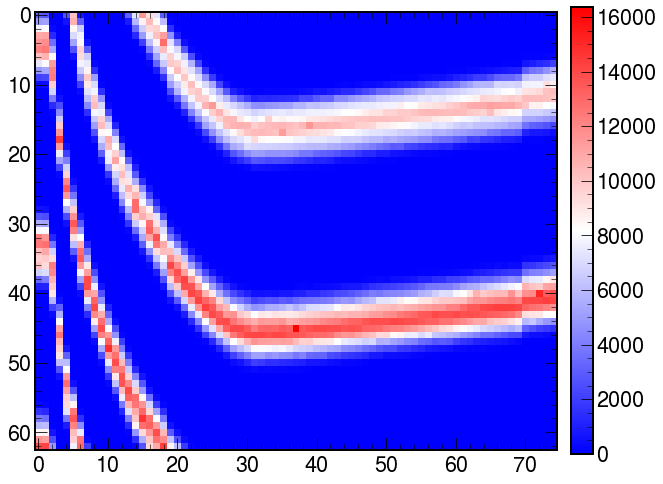

In [5]:
x=np.array(list(df.phaseScan_1p20V_CapSel56.values))
plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'])
plt.colorbar(fraction=0.04, pad=.025);

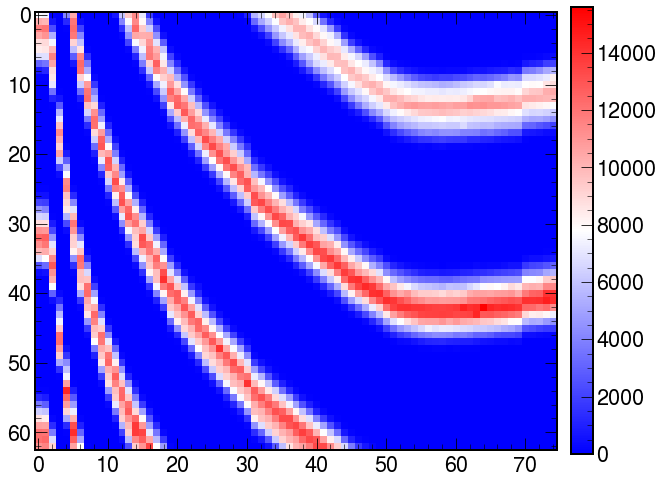

In [6]:
x=np.array(list(df.phaseScan_1p20V_CapSel57.values))
plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'])
plt.colorbar(fraction=0.04, pad=.025);

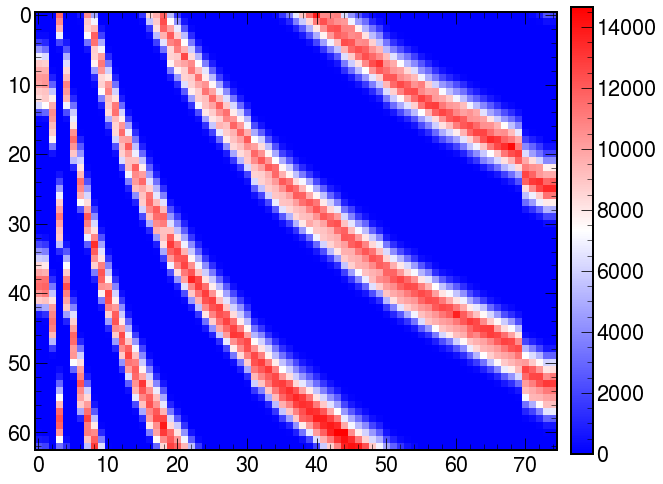

In [7]:
x=np.array(list(df.phaseScan_1p20V_CapSel58.values))
plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'])
plt.colorbar(fraction=0.04, pad=.025);

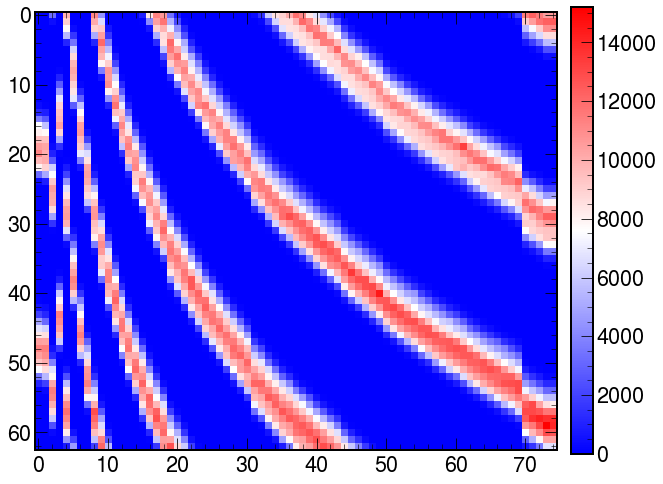

In [8]:
x=np.array(list(df.phaseScan_1p20V_CapSel59.values))
plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'])
plt.colorbar(fraction=0.04, pad=.025);

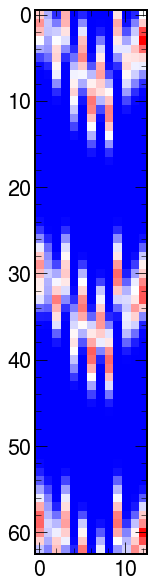

In [9]:
plt.imshow(x[-1,:,:],cmap=mpl.colormaps['bwr'])
